In [48]:
#Regression analyzes relationships between variables.
import pandas as pd
import seaborn as sns

df = pd.read_csv("sonar.csv")
X = df["attribute_1"]
Y = df["attribute_2"]
df[["attribute_1", "attribute_2"]].mean()
df[["attribute_1", "attribute_2"]].corr()
# correlation between number of claims and total payment

,attribute_1,attribute_2
attribute_1,1.000000,0.735896
attribute_2,0.735896,1.000000


In [50]:
df["Class"].unique()

array(['Rock', 'Mine'], dtype=object)

## Linear regression trend lines are straight lines
y=mx + c 

In [53]:
#linear regression 
X = df["attribute_1"]
y = df["attribute_2"]

In [55]:
# logistic regression 
X = df[["attribute_1"]]
y = df["Class"]   # values "R" or "M"

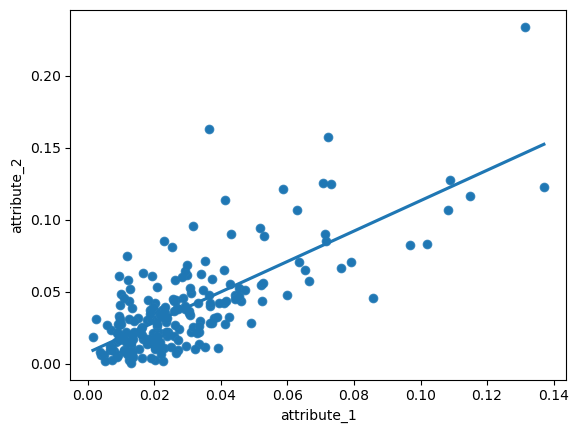

In [59]:
#visualizing variable 
sns.scatterplot(x=df["attribute_1"], y=df["attribute_2"])
#add a linear regression line 
sns.regplot(x=df["attribute_1"], y=df["attribute_2"], ci=None)
plt.show()

In [25]:
import statsmodels.api as sm
#LINEAR REGRESSION
X = df["attribute_1"]
X = sm.add_constant(X)        # adds intercept
y = df["attribute_2"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            attribute_2   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           9.77e-37
Time:                        14:13:29   Log-Likelihood:                 496.26
No. Observations:                 208   AIC:                            -988.5
Df Residuals:                     206   BIC:                            -981.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0077      0.003      3.056      

### statsmodel OLS 

In [66]:
import pandas as pd
import statsmodels.api as sm


# Choose predictors (X) and response (y)
# Example: predict attribute_2 using attribute_1, attribute_3, attribute_4, attribute_5, attribute_6
X = df[['attribute_1', 'attribute_3', 'attribute_4', 'attribute_5', 'attribute_6']]     #DOUBLE BRACKETS SO ITS A DATA FRAME
X = sm.add_constant(X)  # adds intercept term
y = df['attribute_2']

# Fit linear regression model
sonar_model = sm.OLS(y, X).fit()

# Print model summary
print(sonar_model.summary())
print(sonar_model.params)
print(sonar_model

                            OLS Regression Results                            
Dep. Variable:            attribute_2   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.09e-57
Time:                        14:46:46   Log-Likelihood:                 554.83
No. Observations:                 208   AIC:                            -1098.
Df Residuals:                     202   BIC:                            -1078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0016      0.003     -0.615      

In [35]:
#  LOGISTIC REGRESSION 
df["Class_int"] = df["Class"].map({"Rock":1, "Mine":0})

X = sm.add_constant(df["attribute_1"])
y = df["Class_int"]

log_model = sm.Logit(y, X).fit()
print(log_model.summary())


Optimization terminated successfully.
         Current function value: 0.648299
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Class_int   No. Observations:                  208
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                 0.06163
Time:                        14:27:46   Log-Likelihood:                -134.85
converged:                       True   LL-Null:                       -143.70
Covariance Type:            nonrobust   LLR p-value:                 2.567e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7239      0.264      2.738      0.006       0.206       1.242
attribute_1   -31.2575    

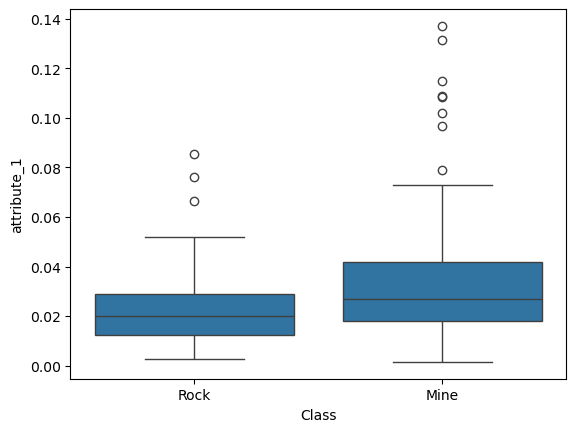

In [68]:
#Scatter plots aren’t ideal for categorical x variables.
sns.boxplot(x="Class", y="attribute_1", data=df)
plt.show()

In [70]:
#mean by category
df.groupby("Class")["attribute_1"].mean()


Class
Mine    0.034989
Rock    0.022498
Name: attribute_1, dtype: float64

## formula ols- response_variable ~ explanatory_variable(s)

In [75]:
# formula ols example woth multiple vcariables 
from statsmodels.formula.api import ols

# Predict attribute_1 using multiple predictors: attribute_2, attribute_3, attribute_4
model = ols("attribute_1 ~ attribute_2 + attribute_3 + attribute_4", data=df).fit()

# Print coefficients
print(model.params)

# Full summary
print(model.summary())


Intercept      0.008722
attribute_2    0.517304
attribute_3   -0.060492
attribute_4    0.059572
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            attribute_1   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     82.18
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.77e-35
Time:                        14:59:15   Log-Likelihood:                 572.48
No. Observations:                 208   AIC:                            -1137.
Df Residuals:                     204   BIC:                            -1124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [77]:
# normal ols (X/y) same example 
import statsmodels.api as sm

# Predictors
X = df[["attribute_2", "attribute_3", "attribute_4"]]
X = sm.add_constant(X)  # add intercept

# Response
y = df["attribute_1"]

# Fit model
model_xy = sm.OLS(y, X).fit()

# Print coefficients
print(model_xy.params)
print(model_xy.summary())


const          0.008722
attribute_2    0.517304
attribute_3   -0.060492
attribute_4    0.059572
dtype: float64
                            OLS Regression Results                            
Dep. Variable:            attribute_1   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     82.18
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           6.77e-35
Time:                        14:59:37   Log-Likelihood:                 572.48
No. Observations:                 208   AIC:                            -1137.
Df Residuals:                     204   BIC:                            -1124.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [72]:
# linear regression with catagorical variable 
from statsmodels.formula.api import ols

# attribute_1 ~ Class
model = ols("attribute_1 ~ Class", data=df).fit()

# View coefficients
print(model.params)


from statsmodels.formula.api import ols

# Linear regression without intercept
model = ols("attribute_1 ~ Class + 0", data=df).fit()

# View coefficients
print(model.params)


Intercept        0.034989
Class[T.Rock]   -0.012491
dtype: float64


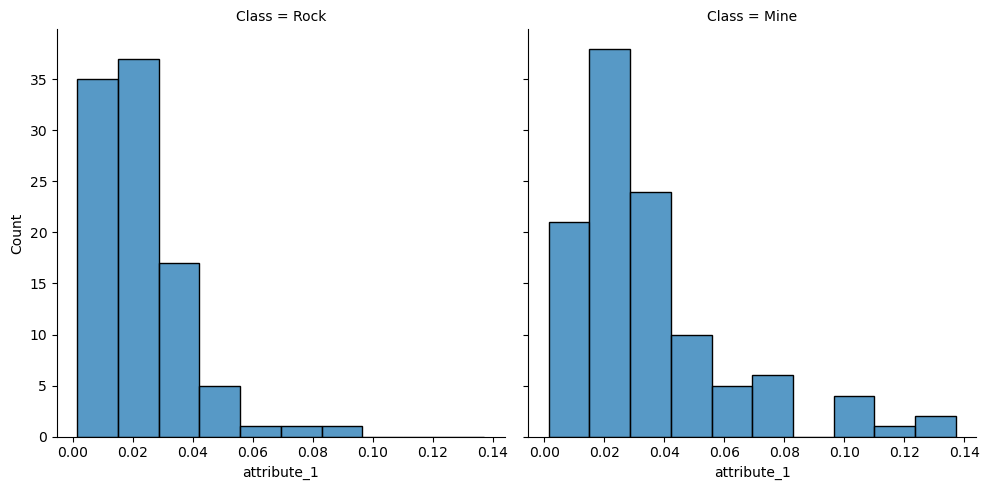

In [79]:
sns.displot(
    data=df,               # sonar dataset
    x="attribute_1",       # numeric variable
    bins=10,               # number of histogram bins
    col="Class"            # split panels by categorical variable
)

# Show the plot
plt.show()

In [81]:
# Calculate the mean of attribute_1, grouped by Class
mean_attr1_by_class = df.groupby("Class")["attribute_1"].mean()

# Print the result
print(mean_attr1_by_class)


Class
Mine    0.034989
Rock    0.022498
Name: attribute_1, dtype: float64
